In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the data
df = pd.read_csv('sustainability_dataset.csv')

# Display the first few rows
df.head()

,Product,Raw Material (kg CO2),Weaving (kg CO2),Dyeing (kWh),Finishing (Litres H2O),Energy Used (kWh),Water Used (Litres),CO2 Used (kg),Sustainability Grade
0,Cabin Crew Jacket,2.0,4.3,5.9,974,18.9,1050,10.0,C
1,Athletic Performance Tee,1.1,2.2,3.7,495,11.0,583,6.1,B
2,Slip-Resistant Clogs,1.4,0.8,2.7,398,13.2,331,8.7,A
3,Hiking Shell Jacket,3.2,5.2,7.7,1145,26.7,1333,15.2,D
4,Slip-Resistant Clogs,2.4,1.5,3.4,473,17.0,631,11.0,B


In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check data types and missing values
df.info()

Dataset shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product                 1000 non-null   object 
 1   Raw Material (kg CO2)   1000 non-null   float64
 2   Weaving (kg CO2)        1000 non-null   float64
 3   Dyeing (kWh)            1000 non-null   float64
 4   Finishing (Litres H2O)  1000 non-null   int64  
 5   Energy Used (kWh)       1000 non-null   float64
 6   Water Used (Litres)     1000 non-null   int64  
 7   CO2 Used (kg)           1000 non-null   float64
 8   Sustainability Grade    1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [3]:
# Generate descriptive statistics
df.describe()

,Raw Material (kg CO2),Weaving (kg CO2),Dyeing (kWh),Finishing (Litres H2O),Energy Used (kWh),Water Used (Litres),CO2 Used (kg)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.300100,3.355200,5.001700,789.571000,18.009900,960.843000,11.004300
std,0.913107,1.417823,1.653421,277.820401,6.145217,345.820923,3.858889
min,0.600000,0.800000,1.800000,283.000000,5.800000,310.000000,3.600000
25%,1.600000,2.200000,3.800000,567.000000,13.200000,689.750000,8.000000
50%,2.200000,3.100000,4.700000,757.500000,17.500000,910.500000,10.700000
75%,3.000000,4.400000,6.000000,964.250000,22.300000,1191.000000,13.900000
max,4.800000,6.900000,9.700000,1565.000000,35.100000,1859.000000,21.500000


In [4]:
# Count of each product type
product_counts = df['Product'].value_counts()
print(f"Number of unique products: {len(product_counts)}")
print("\nProduct counts:")
product_counts

Number of unique products: 25

Product counts:


Product
Waterproof Hiking Boots         68
Tactical Cargo Pants            64
Hiking Shell Jacket             60
Security Guard Blazer           56
Cabin Crew Jacket               54
Steel Toe Boots                 51
Training Tracksuit              51
Mechanic Jumpsuit               48
Construction Coverall           45
High-Top Basketball Sneakers    40
Chef Coat                       39
Insulated Camping Vest          37
Police Patrol Shirt             36
Factory Lab Coat                35
Industrial Work Shirt           35
Running Windbreaker             35
Athletic Performance Tee        34
Slip-Resistant Clogs            33
Paramedic Scrubs                31
Yoga Leggings                   30
Waterproof Parka                25
Lightweight Running Shoes       25
Welding Apron                   25
Compression Tights              24
Trail Running Shorts            19
Name: count, dtype: int64

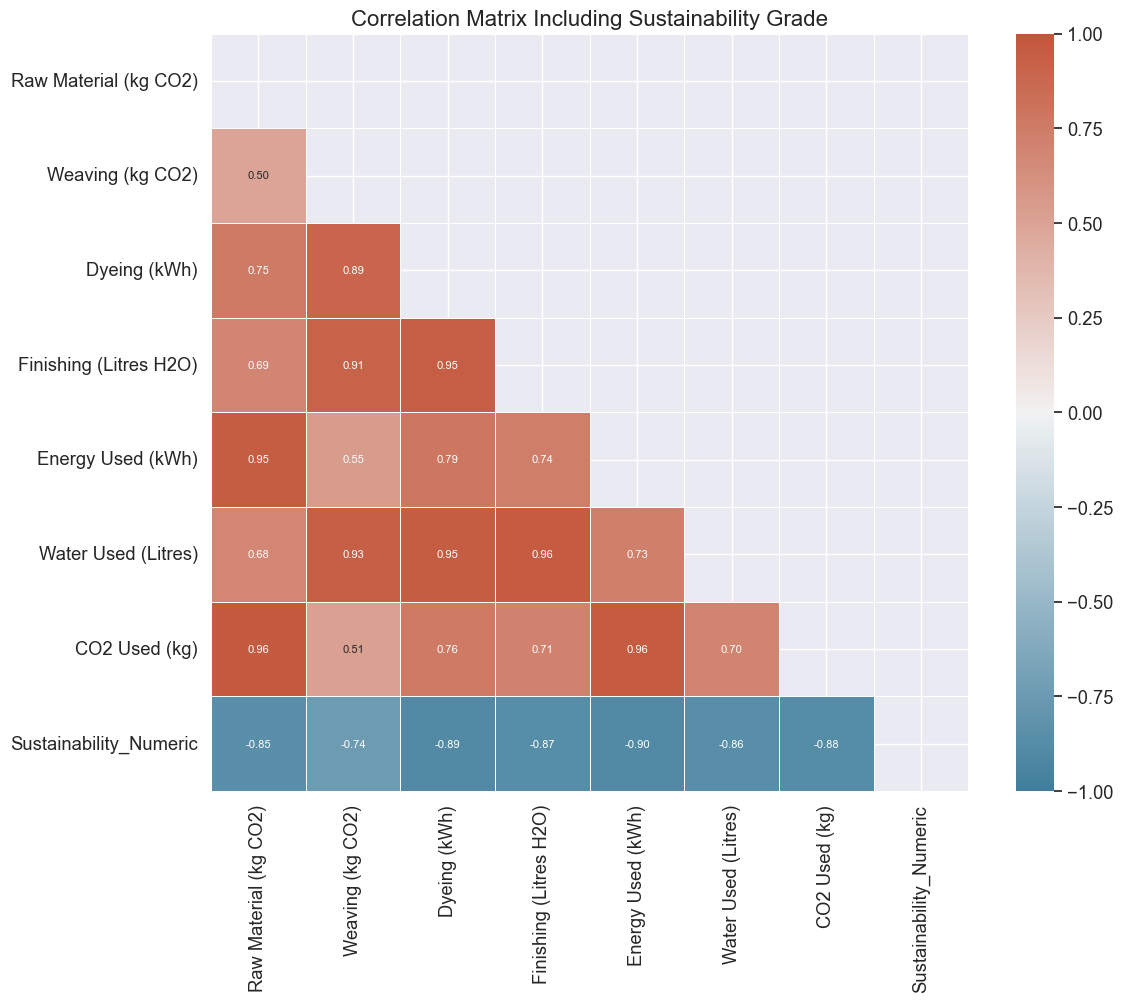

In [7]:
# Select all numerical columns including our new numerical sustainability column
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', annot_kws={"size": 8})

plt.title('Correlation Matrix Including Sustainability Grade', fontsize=16)
plt.tight_layout()
plt.show()

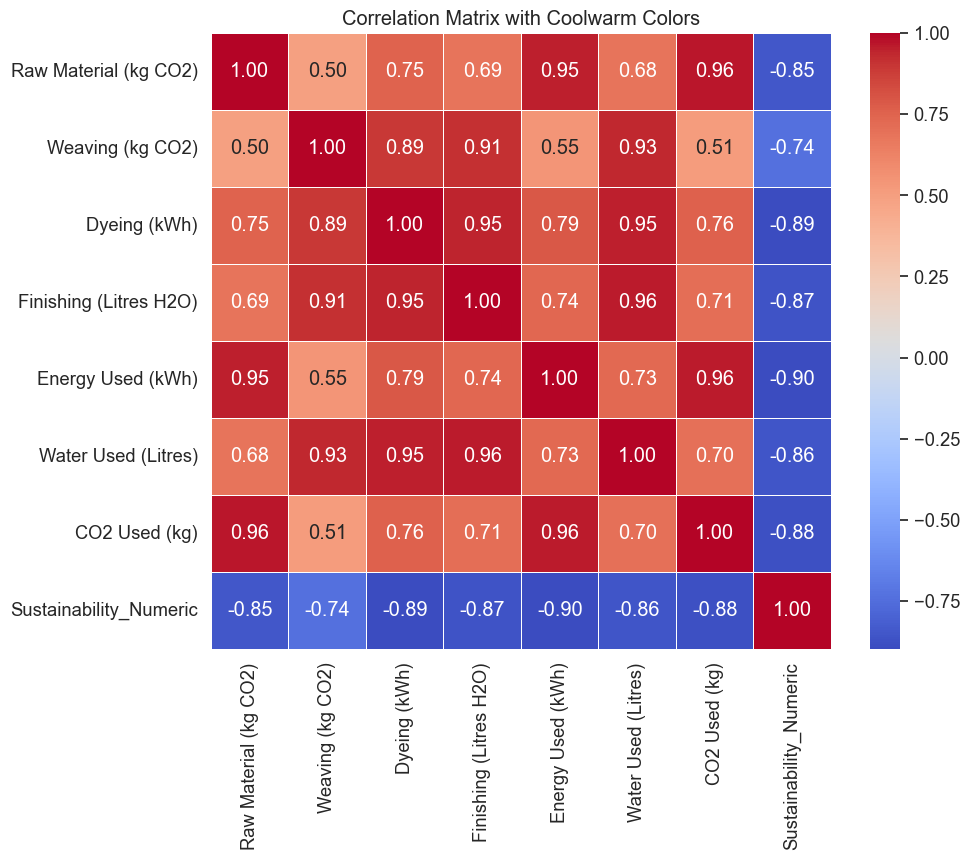

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Selecting numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap with a different color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Coolwarm Colors")
plt.show()


C:\Users\mynam\AppData\Local\Temp\ipykernel_12404\3069563852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sustainability Grade', data=df, palette='viridis')


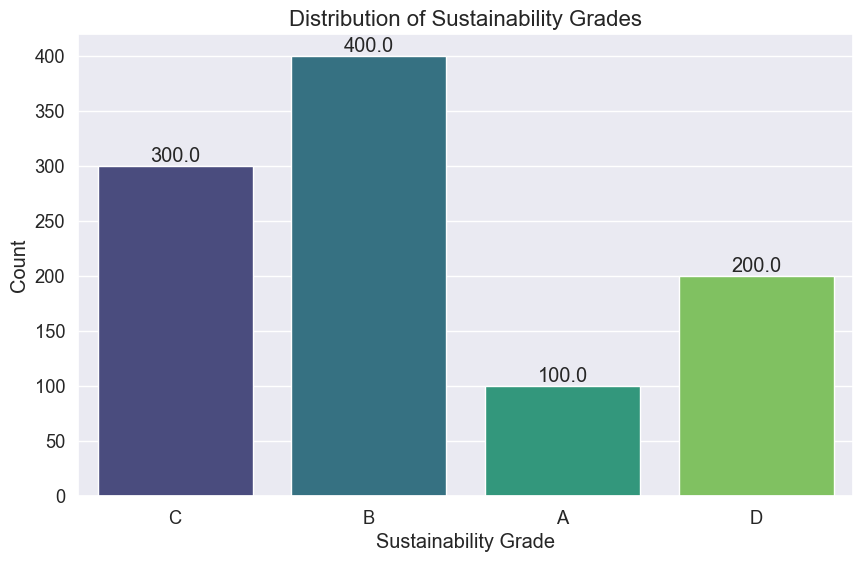

In [12]:
# Count plot of sustainability grades
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sustainability Grade', data=df, palette='viridis')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Distribution of Sustainability Grades', fontsize=16)
plt.xlabel('Sustainability Grade')
plt.ylabel('Count')
plt.show()

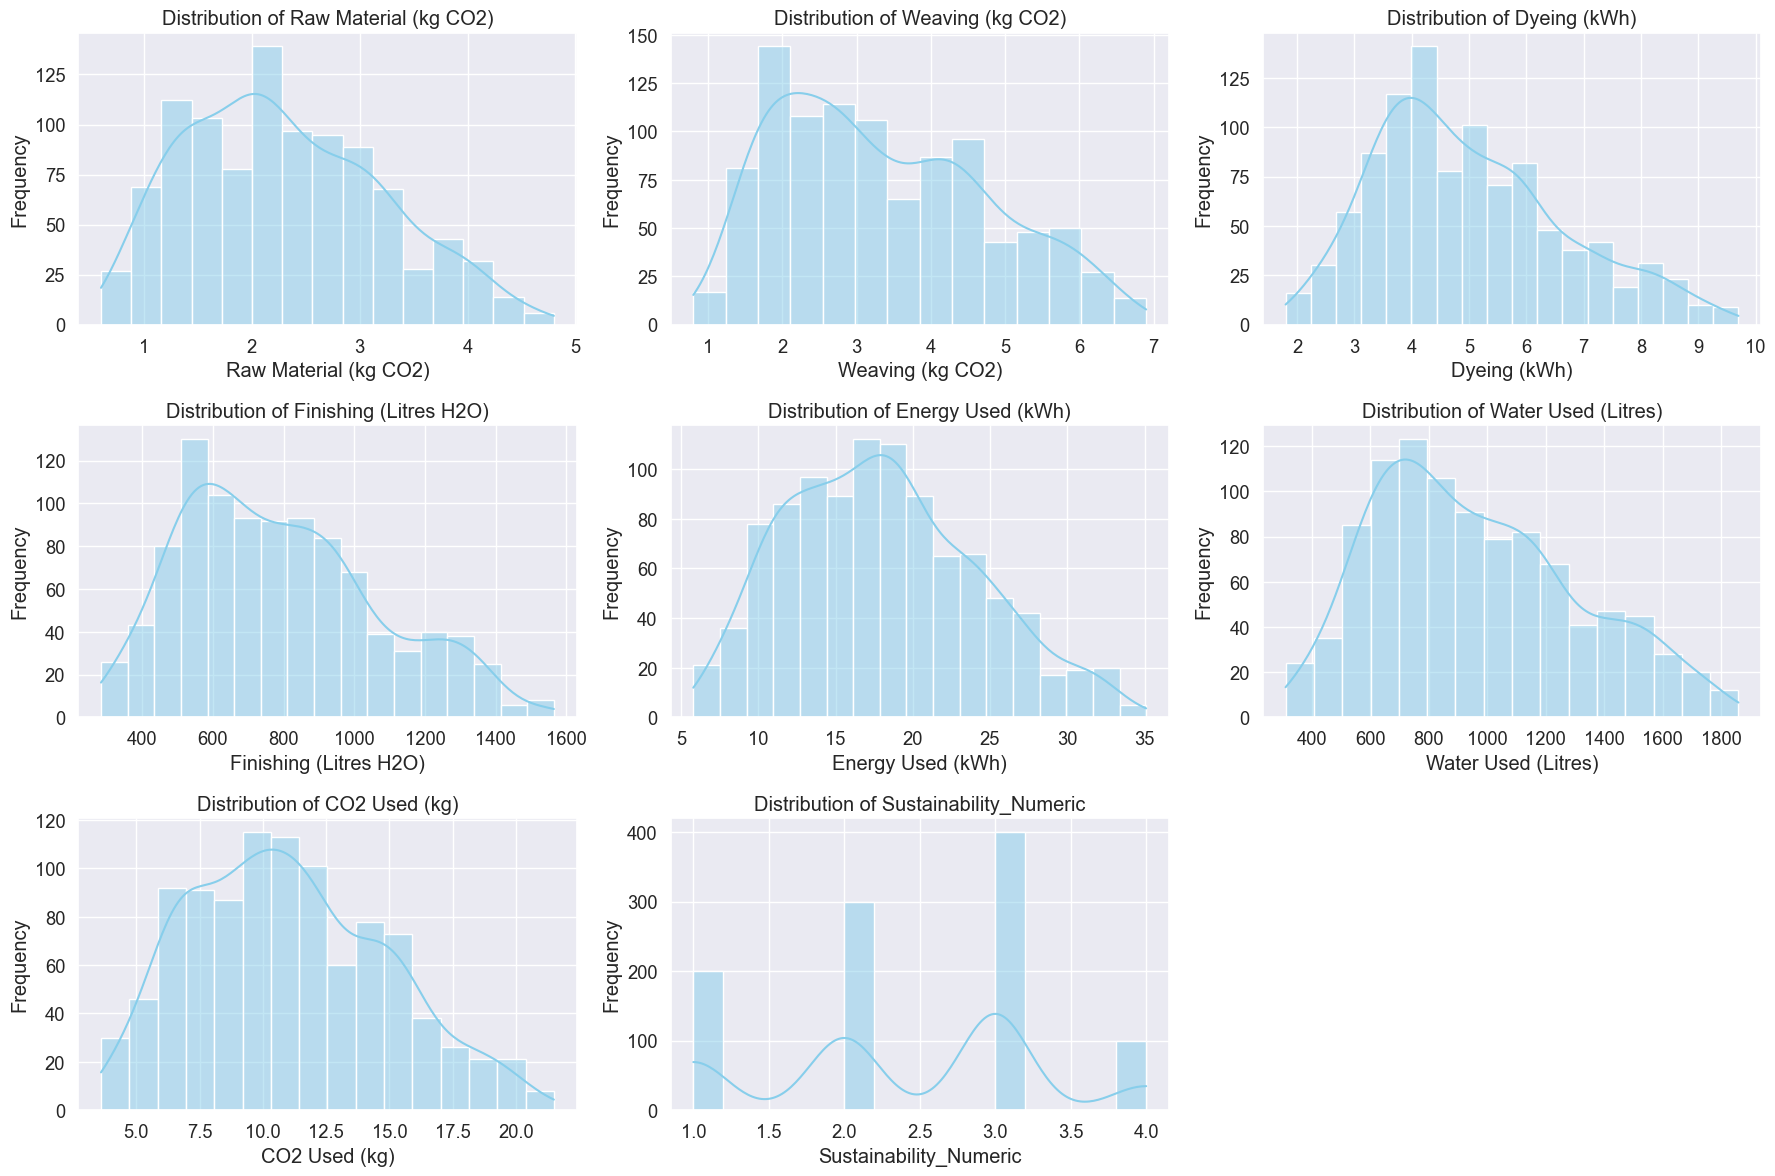

In [13]:
# Create histograms for all numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
num_cols = len(numeric_df.columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\mynam\AppData\Local\Temp\ipykernel_12404\3751412355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='CO2 Used (kg)', data=df, palette='Set3')


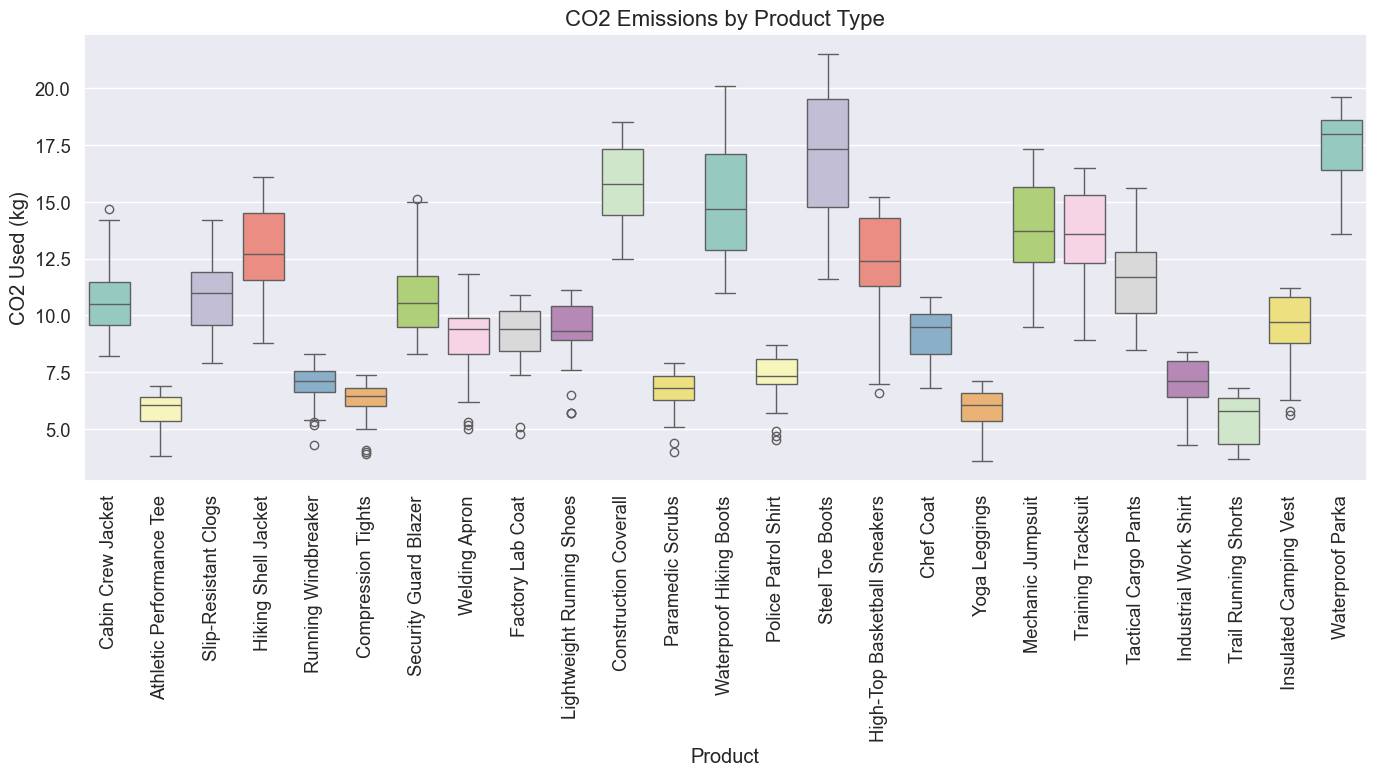

In [14]:
# Create a boxplot for CO2 emissions by product type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product', y='CO2 Used (kg)', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Product Type', fontsize=16)
plt.xlabel('Product')
plt.ylabel('CO2 Used (kg)')
plt.tight_layout()
plt.show()

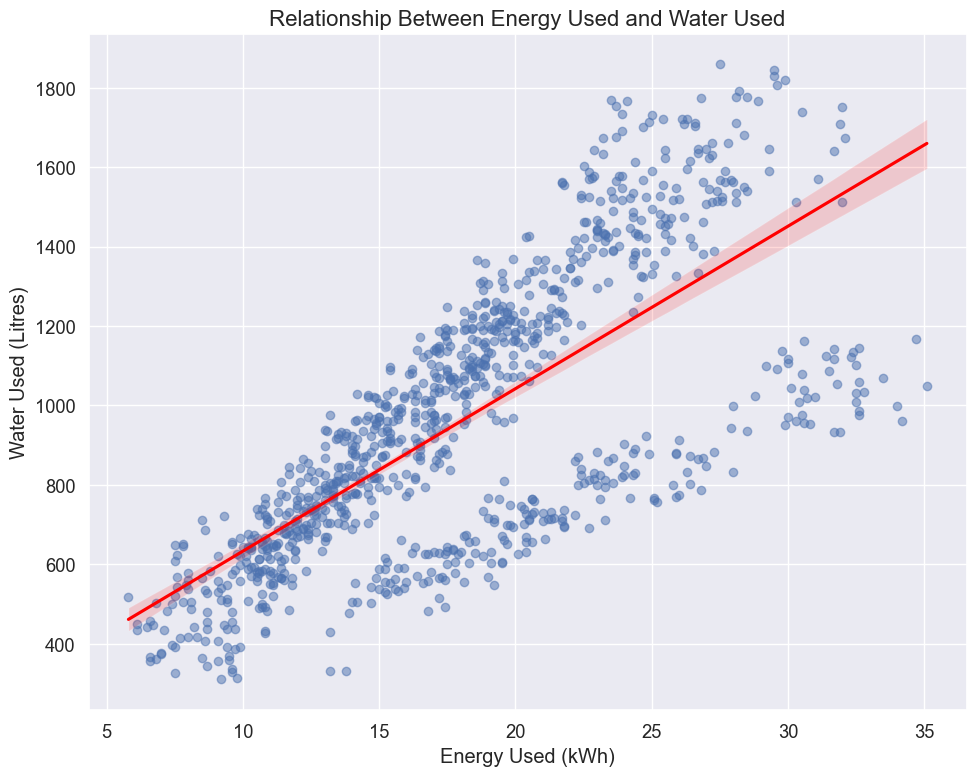

In [15]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x='Energy Used (kWh)', y='Water Used (Litres)', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Energy Used and Water Used', fontsize=16)
plt.xlabel('Energy Used (kWh)')
plt.ylabel('Water Used (Litres)')
plt.tight_layout()
plt.show()

C:\Users\mynam\AppData\Local\Temp\ipykernel_12404\2918475181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sustainability Grade', y='CO2 Used (kg)', data=co2_by_grade, palette='viridis')


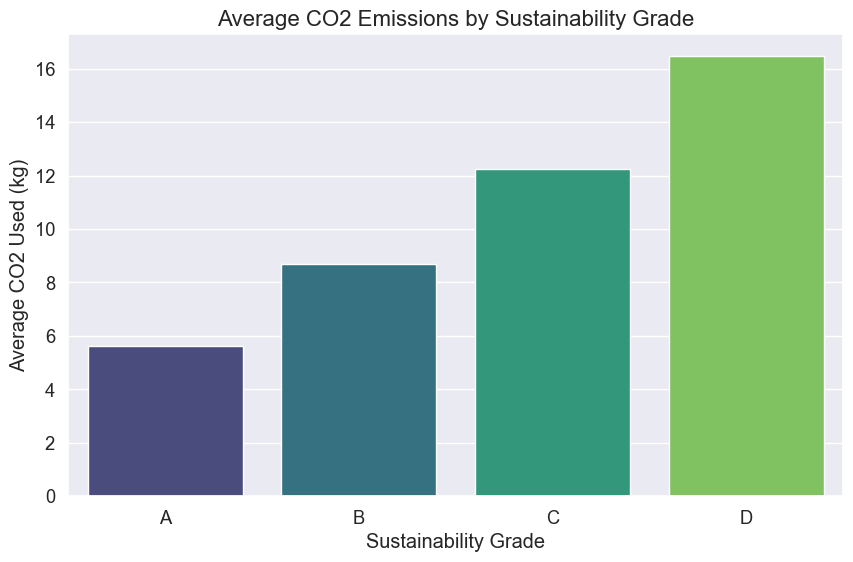

In [16]:
# Calculate average CO2 by sustainability grade
co2_by_grade = df.groupby('Sustainability Grade')['CO2 Used (kg)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sustainability Grade', y='CO2 Used (kg)', data=co2_by_grade, palette='viridis')
plt.title('Average CO2 Emissions by Sustainability Grade', fontsize=16)
plt.xlabel('Sustainability Grade')
plt.ylabel('Average CO2 Used (kg)')
plt.show()

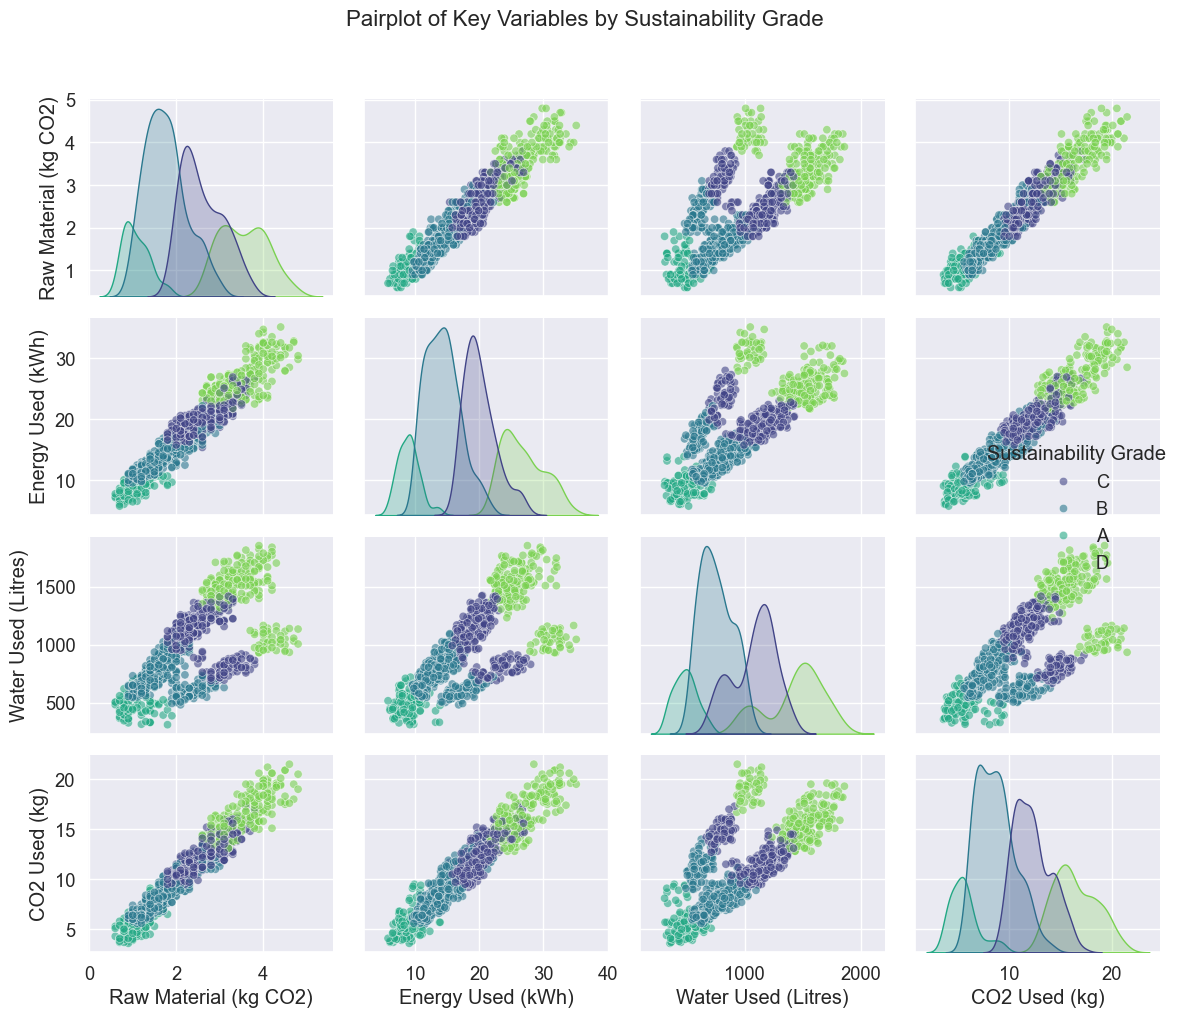

In [17]:
# Create a pairplot for selected variables
selected_vars = ['Raw Material (kg CO2)', 'Energy Used (kWh)', 
                'Water Used (Litres)', 'CO2 Used (kg)', 'Sustainability Grade']
sns.pairplot(df[selected_vars], hue='Sustainability Grade', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot of Key Variables by Sustainability Grade', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

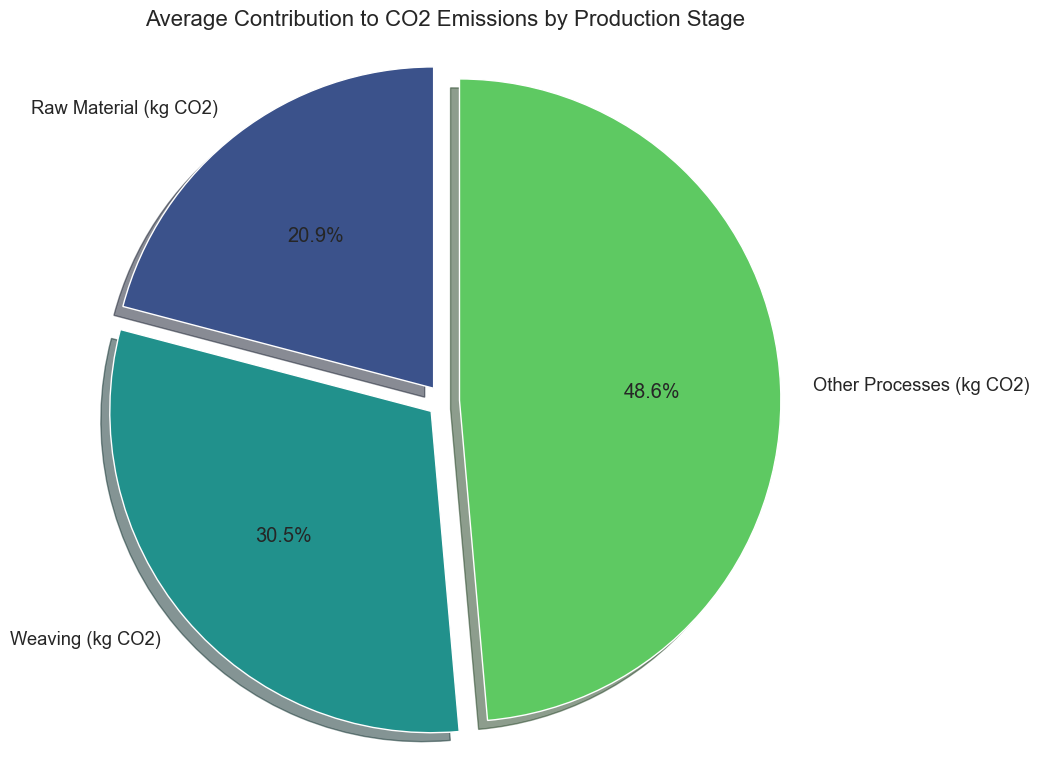

In [18]:
# Calculate average contribution of each production stage to CO2
co2_stages = df[['Raw Material (kg CO2)', 'Weaving (kg CO2)']].copy()
co2_stages['Other Processes (kg CO2)'] = df['CO2 Used (kg)'] - co2_stages['Raw Material (kg CO2)'] - co2_stages['Weaving (kg CO2)']
co2_stages_mean = co2_stages.mean()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(co2_stages_mean, labels=co2_stages_mean.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=(0.05, 0.05, 0.05),
        colors=sns.color_palette('viridis', 3))
plt.title('Average Contribution to CO2 Emissions by Production Stage', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

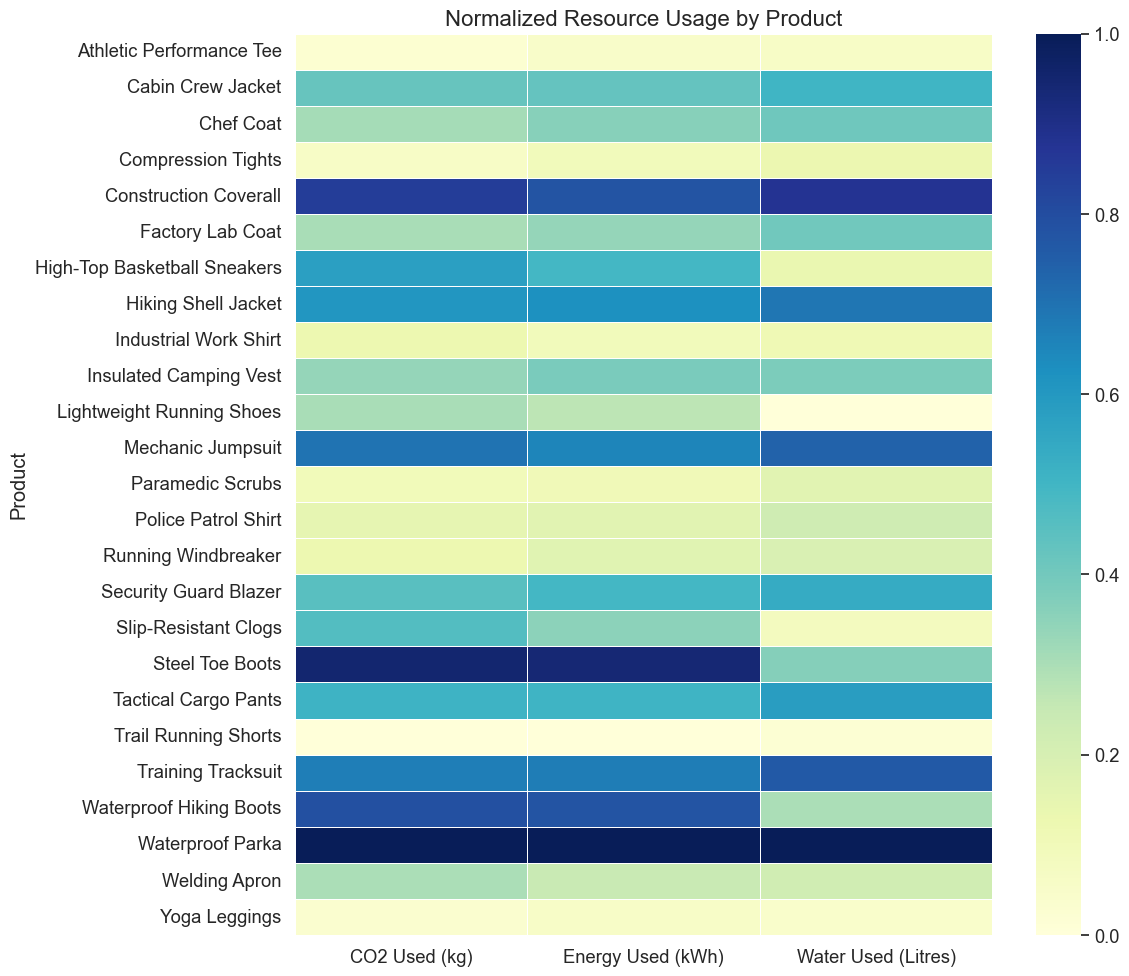

In [19]:
# Create a pivot table of average resource usage by product
resource_cols = ['Energy Used (kWh)', 'Water Used (Litres)', 'CO2 Used (kg)']
product_resources = df.pivot_table(index='Product', values=resource_cols, aggfunc='mean')

# Normalize the data for better visualization
normalized_resources = (product_resources - product_resources.min()) / (product_resources.max() - product_resources.min())

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_resources, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Normalized Resource Usage by Product', fontsize=16)
plt.tight_layout()
plt.show()

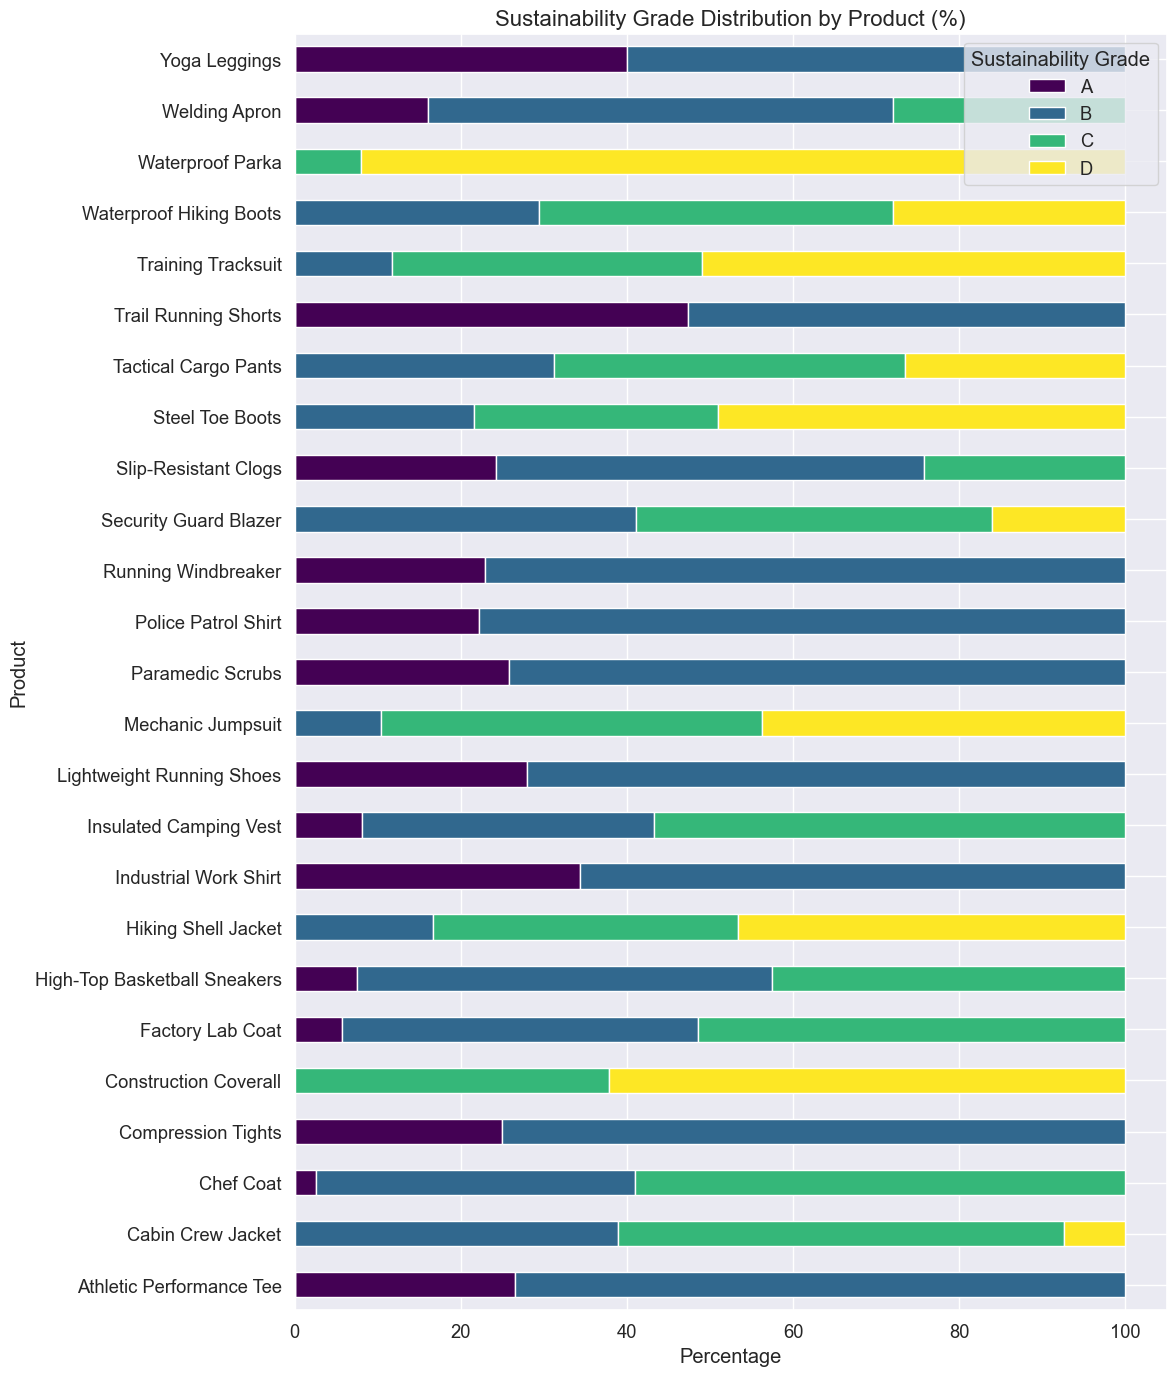

In [20]:
# Create a crosstab of product vs sustainability grade
grade_distribution = pd.crosstab(df['Product'], df['Sustainability Grade'])

# Convert to percentages
grade_distribution_pct = grade_distribution.div(grade_distribution.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
grade_distribution_pct.plot(kind='barh', stacked=True, figsize=(12, 14), 
                           colormap='viridis')
plt.title('Sustainability Grade Distribution by Product (%)', fontsize=16)
plt.xlabel('Percentage')
plt.ylabel('Product')
plt.legend(title='Sustainability Grade')
plt.tight_layout()
plt.show()